In [1]:
import johnny_deep

import numpy as np
np.random.seed(123)

from importlib import reload
reload(johnny_deep.models)
reload(johnny_deep.utils)

<module 'johnny_deep.utils' from '/home/SharedFolder/DSR-Batch17/git/johnny_deep/johnny_deep/utils.py'>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [4]:
X, Y = make_moons(n_samples=1000, noise=0.10, random_state=100)

In [5]:
# Workshop #9 Overfitting
Y[np.random.random(Y.shape[0]) < 0.3] = 1
Y[np.random.random(Y.shape[0]) < 0.3] = 0

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train = X_train.transpose()
X_test = X_test.transpose()
del X, Y

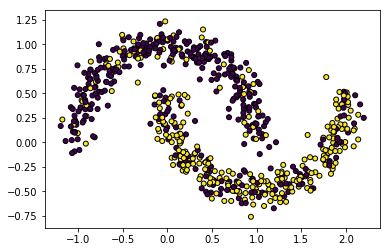

In [7]:
plt.scatter(X_train[0, :], X_train[1, :], marker='o', c=Y_train, s=25, edgecolor='k')

In [8]:
nn_architecture = [
    {"dimension": 2, "type": "input"},    
#    {"dimension": 20, "type": "sigmoid"},
#    {"dimension": 20, "type": "sigmoid"},
#    {"dimension": 20, "type": "sigmoid"},
# WORKSHOP #5: code ReLU activation function
     {"dimension": 80, "type": "relu", "dropout": 0.2},
     {"dimension": 80, "type": "relu", "dropout": 0.2},
     {"dimension": 80, "type": "relu", "dropout": 0.2},
    {"dimension": 1, "type": "sigmoid"},
]

In [9]:
m = johnny_deep.models.Model(nn_architecture)

In [10]:
m.model_info()

Layer 1: relu with dimension 80
W shape: (80, 2)
b shape: (80, 1)
Layer 2: relu with dimension 80
W shape: (80, 80)
b shape: (80, 1)
Layer 3: relu with dimension 80
W shape: (80, 80)
b shape: (80, 1)
Layer 4: sigmoid with dimension 1
W shape: (1, 80)
b shape: (1, 1)


In [11]:
# WORKSHOP #6
#m.fit(X_train, Y_train, 2000, 0.2, mini_batch_size = 32, momentum_decay_rate = 0.9, rmsprop = True, print_every = 100)
m.train()
m.fit(X_train, Y_train, 2000, 0.1, mini_batch_size = 32, momentum_decay_rate = 0.9, rmsprop = False, print_every = 100)
m.eval()
#for ix in range(10000):
#    Y_hat = m.forward(X_train)
    # Workshop #4: fill the batch gradient descent loop
#    epoch_no = ix+1
#    m.back_propagation(Y_train)
#    m.optimization_step(0.1)
#    cost = johnny_deep.utils.get_cost_value(Y_hat, Y_train)
#    if epoch_no % 100 == 0:
#        print("Epoch {} - cost {}".format(epoch_no, cost))

Epoch 100 - cost 0.5946256170418763
Epoch 200 - cost 0.2856220397481527
Epoch 300 - cost 0.18934959085580247
Epoch 400 - cost 0.14159685821239396
Epoch 500 - cost 0.1128274951496329
Epoch 600 - cost 0.0936552836571172
Epoch 700 - cost 0.07994011994693895
Epoch 800 - cost 0.06989295194615597
Epoch 900 - cost 0.06200012380014504
Epoch 1000 - cost 0.055687696797829936
Epoch 1100 - cost 0.05053150010359891
Epoch 1200 - cost 0.04620361949193897
Epoch 1300 - cost 0.042632665542367734
Epoch 1400 - cost 0.03954726691339402
Epoch 1500 - cost 0.036813362317131705
Epoch 1600 - cost 0.03442843206805556
Epoch 1700 - cost 0.03235292598711944
Epoch 1800 - cost 0.030511409413607363
Epoch 1900 - cost 0.028841659861330176
Epoch 2000 - cost 0.02735810624090406


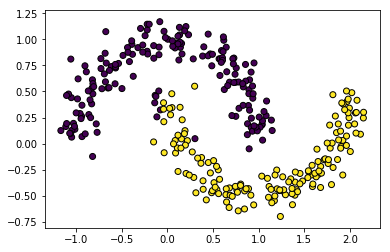

In [12]:
# Workshop #1: implement forward pass!
Y_hat = m.forward(X_test)
Y_pred = johnny_deep.utils.convert_prob_into_class(Y_hat)
plt.scatter(X_test[0, :], X_test[1, :], marker='o', c=Y_pred, edgecolor='k')

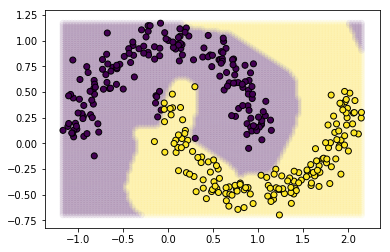

In [13]:
def plot_w_boundary_background(m, X, Y_hat):
    xx = np.linspace(X[0].min(), X[0].max(), 100)
    yy = np.linspace(X[1].min(), X[1].max(), 100)
    xy1, xy2 = np.meshgrid(xx, yy)
    grid = np.vstack([xy1.flatten(), xy2.flatten()])
    background = m.forward(grid)
    Y_pred = johnny_deep.utils.convert_prob_into_class(Y_hat)
    background = johnny_deep.utils.convert_prob_into_class(background)
    Y_pred = johnny_deep.utils.convert_prob_into_class(Y_hat)
    background = johnny_deep.utils.convert_prob_into_class(background)
    plt.scatter(grid[0,:], grid[1,:], c = background, alpha = 0.05)
    plt.scatter(X[0, :], X[1, :], marker='o', c=Y_pred, edgecolor='k')

plot_w_boundary_background(m, X_test, Y_hat)

In [14]:
# JUST DEBUGGIG
m_debug = johnny_deep.models.Model(nn_architecture)
y_hat_debug = m_debug.forward(X_test)
m_debug.back_propagation(Y_test)
print(f"Shape X_test: {X_test.shape}")
print(f"Shape Y_test: {Y_test.shape}")
print(f"Shape Y_hat_test: {y_hat_debug.shape}")
print(f"Shape W: {m_debug.params_values['W1'].shape}")
print(f"Shape dW: {m_debug.grads_values['dW1'].shape}")
print(f"Shape b: {m_debug.params_values['b1'].shape}")
print(f"Shape db: {m_debug.grads_values['db1'].shape}")

Shape X_test: (2, 330)
Shape Y_test: (330,)
Shape Y_hat_test: (1, 330)
Shape W: (80, 2)
Shape dW: (80, 2)
Shape b: (80, 1)
Shape db: (80, 1)
